In [2]:
import numpy as np
import pandas as pd
import tensorflow
from tensorflow import keras
from sklearn.datasets import make_circles
from keras.layers import Dense
from keras import Sequential

In [3]:
X,y=make_circles(n_samples=200,noise=0,random_state=2)

In [4]:
import matplotlib.pyplot as plt

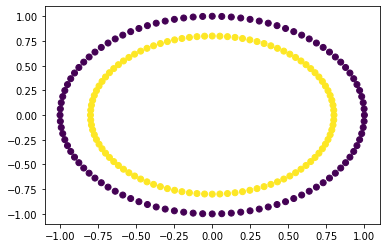

In [5]:
plt.scatter(X[:,0],X[:,1],c=y[:])

## ** Model1 is used for the relu function with no manual weight initialization**

In [6]:
model1=Sequential()
model1.add(Dense(8,activation='relu',input_dim=2))
model1.add(Dense(8,activation='relu'))
model1.add(Dense(8,activation='relu'))
model1.add(Dense(8,activation='relu'))
model1.add(Dense(1,activation='sigmoid'))

In [7]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 24        
                                                                 
 dense_1 (Dense)             (None, 8)                 72        
                                                                 
 dense_2 (Dense)             (None, 8)                 72        
                                                                 
 dense_3 (Dense)             (None, 8)                 72        
                                                                 
 dense_4 (Dense)             (None, 1)                 9         
                                                                 
Total params: 249
Trainable params: 249
Non-trainable params: 0
_________________________________________________________________


In [8]:
model1.compile(optimizer='adam',metrics=['accuracy'],loss='binary_crossentropy')

In [9]:
history1=model1.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
5/5 [==============================] - 4s 72ms/step - loss: 0.6958 - accuracy: 0.5250 - val_loss: 0.7089 - val_accuracy: 0.4000
Epoch 2/100
5/5 [==============================] - 0s 10ms/step - loss: 0.6954 - accuracy: 0.5188 - val_loss: 0.7083 - val_accuracy: 0.4000
Epoch 3/100
5/5 [==============================] - 0s 8ms/step - loss: 0.6949 - accuracy: 0.5312 - val_loss: 0.7088 - val_accuracy: 0.4000
Epoch 4/100
5/5 [==============================] - 0s 8ms/step - loss: 0.6948 - accuracy: 0.5250 - val_loss: 0.7088 - val_accuracy: 0.4000
Epoch 5/100
5/5 [==============================] - 0s 8ms/step - loss: 0.6945 - accuracy: 0.5250 - val_loss: 0.7093 - val_accuracy: 0.4000
Epoch 6/100
5/5 [==============================] - 0s 8ms/step - loss: 0.6942 - accuracy: 0.5250 - val_loss: 0.7093 - val_accuracy: 0.3750
Epoch 7/100
5/5 [==============================] - 0s 8ms/step - loss: 0.6940 - accuracy: 0.5312 - val_loss: 0.7097 - val_accuracy: 0.3750
Epoch 8/100
5/5 [========

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


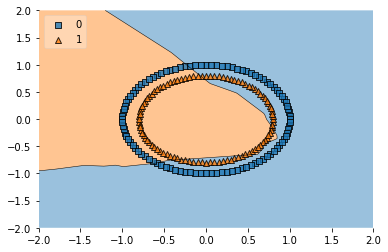

In [10]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'),clf=model1,legend=2)

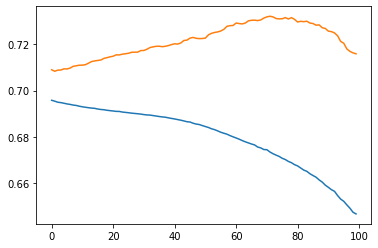

In [11]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])      

## **For relu as we can see that that there is no vanishing gradient**

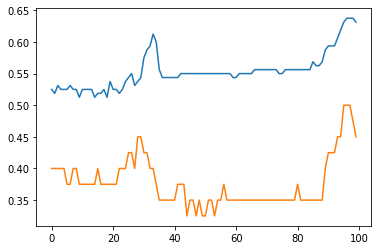

In [12]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])   

## **model2 is used for the sigmoid function with no manual weight initialization**

In [13]:
model2=Sequential()
model2.add(Dense(8,activation='sigmoid',input_dim=2))
model2.add(Dense(8,activation='sigmoid'))
model2.add(Dense(8,activation='sigmoid'))
model2.add(Dense(8,activation='sigmoid'))
model2.add(Dense(1,activation='sigmoid'))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 8)                 24        
                                                                 
 dense_6 (Dense)             (None, 8)                 72        
                                                                 
 dense_7 (Dense)             (None, 8)                 72        
                                                                 
 dense_8 (Dense)             (None, 8)                 72        
                                                                 
 dense_9 (Dense)             (None, 1)                 9         
                                                                 
Total params: 249
Trainable params: 249
Non-trainable params: 0
_________________________________________________________________


In [14]:
model2.compile(metrics=['accuracy'],loss='binary_crossentropy',optimizer='adam')

In [15]:
history2=model2.fit(X,y,epochs=500,validation_split=0.2)

Epoch 1/500
5/5 [==============================] - 1s 40ms/step - loss: 0.7100 - accuracy: 0.4812 - val_loss: 0.6820 - val_accuracy: 0.5750
Epoch 2/500
5/5 [==============================] - 0s 7ms/step - loss: 0.7054 - accuracy: 0.4812 - val_loss: 0.6826 - val_accuracy: 0.5750
Epoch 3/500
5/5 [==============================] - 0s 8ms/step - loss: 0.7026 - accuracy: 0.4812 - val_loss: 0.6835 - val_accuracy: 0.5750
Epoch 4/500
5/5 [==============================] - 0s 8ms/step - loss: 0.7003 - accuracy: 0.4812 - val_loss: 0.6848 - val_accuracy: 0.5750
Epoch 5/500
5/5 [==============================] - 0s 8ms/step - loss: 0.6981 - accuracy: 0.4812 - val_loss: 0.6862 - val_accuracy: 0.5750
Epoch 6/500
5/5 [==============================] - 0s 7ms/step - loss: 0.6962 - accuracy: 0.4812 - val_loss: 0.6876 - val_accuracy: 0.5750
Epoch 7/500
5/5 [==============================] - 0s 7ms/step - loss: 0.6956 - accuracy: 0.4812 - val_loss: 0.6893 - val_accuracy: 0.5750
Epoch 8/500
5/5 [=========

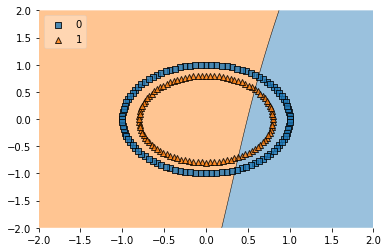

In [16]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'),clf=model2,legend=2)

# ** From the graph, we can see that for some epochs there is vanishing gradient problem and afer that overfiiting occurs**

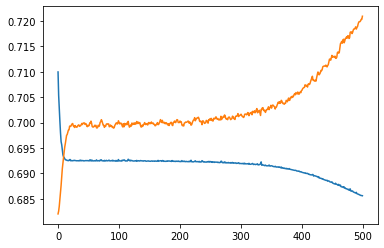

In [17]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])

## **For the sigmoid here we can see the vanishing gradient decent problem**

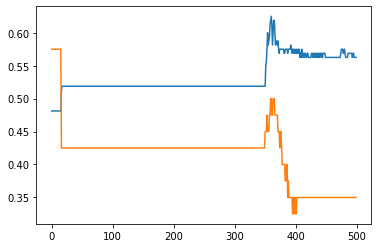

In [18]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])

## **Model3 is used for tanh with no manual weight initialization**

In [18]:
model3=Sequential()
model3.add(Dense(8,activation='tanh',input_dim=2))
model3.add(Dense(8,activation='tanh'))
model3.add(Dense(8,activation='tanh'))
model3.add(Dense(8,activation='tanh'))
model3.add(Dense(8,activation='tanh'))
model3.add(Dense(8,activation='tanh'))
model3.add(Dense(8,activation='tanh'))
model3.add(Dense(8,activation='tanh'))
model3.add(Dense(8,activation='tanh'))
model3.add(Dense(8,activation='tanh'))
model3.add(Dense(1,activation='sigmoid'))
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 8)                 24        
                                                                 
 dense_11 (Dense)            (None, 8)                 72        
                                                                 
 dense_12 (Dense)            (None, 8)                 72        
                                                                 
 dense_13 (Dense)            (None, 8)                 72        
                                                                 
 dense_14 (Dense)            (None, 8)                 72        
                                                                 
 dense_15 (Dense)            (None, 8)                 72        
                                                                 
 dense_16 (Dense)            (None, 8)                

In [19]:
model3.compile(optimizer='adam',metrics=['accuracy'],loss='binary_crossentropy')

In [20]:
history3=model3.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
5/5 [==============================] - 1s 49ms/step - loss: 0.6976 - accuracy: 0.4625 - val_loss: 0.6863 - val_accuracy: 0.6750
Epoch 2/100
5/5 [==============================] - 0s 9ms/step - loss: 0.6947 - accuracy: 0.4938 - val_loss: 0.6987 - val_accuracy: 0.4250
Epoch 3/100
5/5 [==============================] - 0s 8ms/step - loss: 0.6920 - accuracy: 0.5188 - val_loss: 0.7087 - val_accuracy: 0.4250
Epoch 4/100
5/5 [==============================] - 0s 13ms/step - loss: 0.6906 - accuracy: 0.5437 - val_loss: 0.7160 - val_accuracy: 0.4750
Epoch 5/100
5/5 [==============================] - 0s 13ms/step - loss: 0.6893 - accuracy: 0.5375 - val_loss: 0.7240 - val_accuracy: 0.3500
Epoch 6/100
5/5 [==============================] - 0s 8ms/step - loss: 0.6882 - accuracy: 0.5500 - val_loss: 0.7311 - val_accuracy: 0.3500
Epoch 7/100
5/5 [==============================] - 0s 8ms/step - loss: 0.6874 - accuracy: 0.5562 - val_loss: 0.7356 - val_accuracy: 0.3500
Epoch 8/100
5/5 [=======

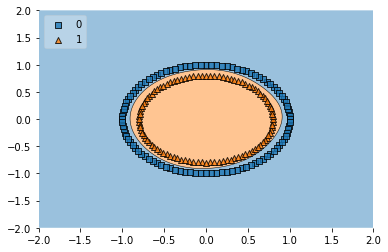

In [21]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'),clf=model3,legend=2)


## ** As we know that tanh function is zero centered so it converge fast, sometimes vanishing gradient decent problem occur**

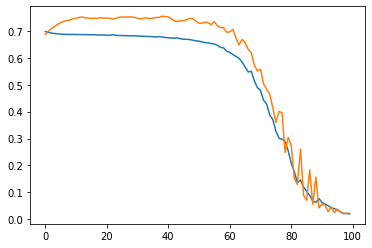

In [22]:
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])

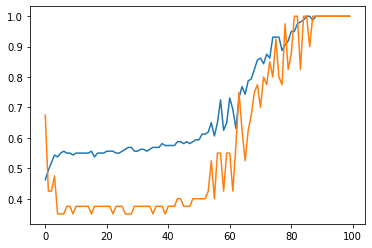

In [23]:
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])

## **Model4 is used for relu function with high manual weight initialization and it converge slowly thats why it takes 400 epochs approximately and it has exploding gradient decent problem . Behaviour of exploding gradient behaviour we can see in the graph of "val_loss" and "loss"**

In [24]:
model4=Sequential()
model4.add(Dense(8,activation='relu',input_dim=2))
model4.add(Dense(8,activation='relu'))
model4.add(Dense(8,activation='relu'))
model4.add(Dense(8,activation='relu'))
model4.add(Dense(1,activation='sigmoid'))
model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 8)                 24        
                                                                 
 dense_22 (Dense)            (None, 8)                 72        
                                                                 
 dense_23 (Dense)            (None, 8)                 72        
                                                                 
 dense_24 (Dense)            (None, 8)                 72        
                                                                 
 dense_25 (Dense)            (None, 1)                 9         
                                                                 
Total params: 249
Trainable params: 249
Non-trainable params: 0
_________________________________________________________________


In [25]:
model4.compile(optimizer='adam',metrics=['accuracy'],loss='binary_crossentropy')

In [26]:
initial_weight4=model4.get_weights()
len(initial_weight4)

10

In [27]:
initial_weight4[0]=np.random.randn(initial_weight4[0].shape[0],initial_weight4[0].shape[1])*2
initial_weight4[1]=np.zeros(initial_weight4[1].shape)
initial_weight4[2]=np.random.randn(initial_weight4[2].shape[0],initial_weight4[2].shape[1])*2
initial_weight4[3]=np.zeros(initial_weight4[3].shape)
initial_weight4[4]=np.random.randn(initial_weight4[4].shape[0],initial_weight4[4].shape[1])*2
initial_weight4[5]=np.zeros(initial_weight4[5].shape)
initial_weight4[6]=np.random.randn(initial_weight4[6].shape[0],initial_weight4[6].shape[1])*2
initial_weight4[7]=np.zeros(initial_weight4[7].shape)
initial_weight4[8]=np.random.randn(initial_weight4[8].shape[0],initial_weight4[8].shape[1])*2
initial_weight4[9]=np.zeros(initial_weight4[9].shape)


In [28]:
# for i in range(10):
#     print(initial_weight4[i].shape)

In [29]:
model4.set_weights(initial_weight4)

In [30]:
history4=model4.fit(X,y,epochs=400,validation_split=0.2)

Epoch 1/400
5/5 [==============================] - 1s 43ms/step - loss: 36.3680 - accuracy: 0.4812 - val_loss: 35.6353 - val_accuracy: 0.5750
Epoch 2/400
5/5 [==============================] - 0s 8ms/step - loss: 34.5225 - accuracy: 0.4812 - val_loss: 33.8405 - val_accuracy: 0.5750
Epoch 3/400
5/5 [==============================] - 0s 8ms/step - loss: 32.7343 - accuracy: 0.4812 - val_loss: 31.8689 - val_accuracy: 0.5750
Epoch 4/400
5/5 [==============================] - 0s 12ms/step - loss: 30.8453 - accuracy: 0.4812 - val_loss: 29.7739 - val_accuracy: 0.5750
Epoch 5/400
5/5 [==============================] - 0s 9ms/step - loss: 29.0551 - accuracy: 0.4812 - val_loss: 27.6491 - val_accuracy: 0.5750
Epoch 6/400
5/5 [==============================] - 0s 8ms/step - loss: 27.0169 - accuracy: 0.4812 - val_loss: 25.6092 - val_accuracy: 0.5750
Epoch 7/400
5/5 [==============================] - 0s 8ms/step - loss: 25.2943 - accuracy: 0.4812 - val_loss: 23.5148 - val_accuracy: 0.5750
Epoch 8/400

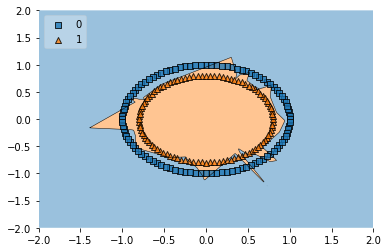

In [31]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'),clf=model4,legend=2)

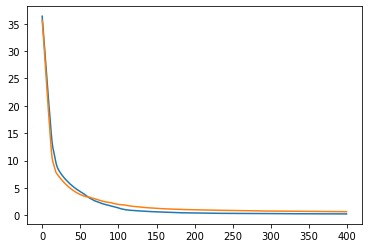

In [32]:
#plt.plot(history4.history4['loss'])
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])

# ** By applying the higher weight to relu function we can here Exploding gradient problem**

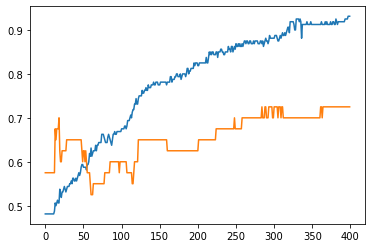

In [34]:
plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])

## **Model5 is used for the sigmoid with high manual weight initialization **

In [97]:
model5=Sequential()
model5.add(Dense(8,activation='sigmoid',input_dim=2))
model5.add(Dense(8,activation='sigmoid'))
model5.add(Dense(8,activation='sigmoid'))
model5.add(Dense(8,activation='sigmoid'))
model5.add(Dense(8,activation='sigmoid'))
model5.add(Dense(8,activation='sigmoid'))
model5.add(Dense(8,activation='sigmoid'))
model5.add(Dense(8,activation='sigmoid'))
model5.add(Dense(8,activation='sigmoid'))
model5.add(Dense(8,activation='sigmoid'))
model5.add(Dense(1,activation='sigmoid'))

model5.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_118 (Dense)           (None, 8)                 24        
                                                                 
 dense_119 (Dense)           (None, 8)                 72        
                                                                 
 dense_120 (Dense)           (None, 8)                 72        
                                                                 
 dense_121 (Dense)           (None, 8)                 72        
                                                                 
 dense_122 (Dense)           (None, 8)                 72        
                                                                 
 dense_123 (Dense)           (None, 8)                 72        
                                                                 
 dense_124 (Dense)           (None, 8)               

In [98]:
model5.compile(optimizer='adam',metrics=['accuracy'],loss='binary_crossentropy')

In [99]:
initial_weight5=model5.get_weights()
len(initial_weight5)

22

In [100]:
initial_weight5[0]=np.random.randn(initial_weight5[0].shape[0],initial_weight5[0].shape[1])*4
initial_weight5[1]=np.zeros(initial_weight5[1].shape)
initial_weight5[2]=np.random.randn(initial_weight5[2].shape[0],initial_weight5[2].shape[1])*4
initial_weight5[3]=np.zeros(initial_weight5[3].shape)
initial_weight5[4]=np.random.randn(initial_weight5[4].shape[0],initial_weight5[4].shape[1])*4
initial_weight5[5]=np.zeros(initial_weight5[5].shape)
initial_weight5[6]=np.random.randn(initial_weight5[6].shape[0],initial_weight5[6].shape[1])*4
initial_weight5[7]=np.zeros(initial_weight5[7].shape)
initial_weight5[8]=np.random.randn(initial_weight5[8].shape[0],initial_weight5[8].shape[1])*4
initial_weight5[9]=np.zeros(initial_weight5[9].shape)
initial_weight5[10]=np.random.randn(initial_weight5[10].shape[0],initial_weight5[10].shape[1])*4
initial_weight5[11]=np.zeros(initial_weight5[11].shape)
initial_weight5[12]=np.random.randn(initial_weight5[12].shape[0],initial_weight5[12].shape[1])*4
initial_weight5[13]=np.zeros(initial_weight5[13].shape)
initial_weight5[14]=np.random.randn(initial_weight5[14].shape[0],initial_weight5[14].shape[1])*4
initial_weight5[15]=np.zeros(initial_weight5[15].shape)
initial_weight5[16]=np.random.randn(initial_weight5[16].shape[0],initial_weight5[16].shape[1])*4
initial_weight5[17]=np.zeros(initial_weight5[17].shape)
initial_weight5[18]=np.random.randn(initial_weight5[18].shape[0],initial_weight5[18].shape[1])*4
initial_weight5[19]=np.zeros(initial_weight5[19].shape)
initial_weight5[20]=np.random.randn(initial_weight5[20].shape[0],initial_weight5[20].shape[1])*4
initial_weight5[21]=np.zeros(initial_weight5[21].shape)





In [75]:
model5.set_weights(initial_weight5)

In [76]:
history5=model5.fit(X,y,epochs=400,validation_split=0.2)

Epoch 1/400
5/5 [==============================] - 1s 49ms/step - loss: 0.7690 - accuracy: 0.4812 - val_loss: 0.7974 - val_accuracy: 0.5750
Epoch 2/400
5/5 [==============================] - 0s 9ms/step - loss: 0.7517 - accuracy: 0.4812 - val_loss: 0.7950 - val_accuracy: 0.3500
Epoch 3/400
5/5 [==============================] - 0s 10ms/step - loss: 0.7288 - accuracy: 0.5250 - val_loss: 0.7930 - val_accuracy: 0.3500
Epoch 4/400
5/5 [==============================] - 0s 12ms/step - loss: 0.7121 - accuracy: 0.5437 - val_loss: 0.7908 - val_accuracy: 0.3250
Epoch 5/400
5/5 [==============================] - 0s 12ms/step - loss: 0.7045 - accuracy: 0.5500 - val_loss: 0.7891 - val_accuracy: 0.3000
Epoch 6/400
5/5 [==============================] - 0s 8ms/step - loss: 0.6948 - accuracy: 0.5562 - val_loss: 0.7876 - val_accuracy: 0.3000
Epoch 7/400
5/5 [==============================] - 0s 8ms/step - loss: 0.6919 - accuracy: 0.5562 - val_loss: 0.7866 - val_accuracy: 0.3250
Epoch 8/400
5/5 [======

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:242: UserWarning: No contour levels were found within the data range.
  antialiased=True)


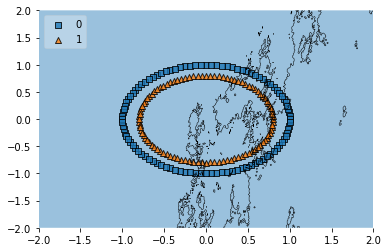

In [101]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'),clf=model5,legend=2)

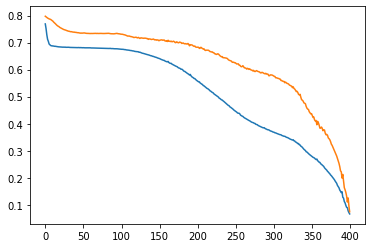

In [102]:
#plt.plot(history4.history4['loss'])
plt.plot(history5.history['loss'])
plt.plot(history5.history['val_loss'])

## **Here easily we can see that vanishing gradient problem as "val_accuracy" is constant**  

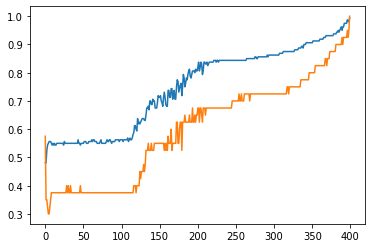

In [103]:
plt.plot(history5.history['accuracy'])
plt.plot(history5.history['val_accuracy'])

## **model6 is used for the tanh function with high random weight initialization**

In [89]:
model6=Sequential()
model6.add(Dense(8,activation='tanh',input_dim=2))
model6.add(Dense(8,activation='tanh'))
model6.add(Dense(8,activation='tanh'))
model6.add(Dense(8,activation='tanh'))
model6.add(Dense(8,activation='tanh'))
model6.add(Dense(8,activation='tanh'))
model6.add(Dense(8,activation='tanh'))
model6.add(Dense(8,activation='tanh'))
model6.add(Dense(8,activation='tanh'))
model6.add(Dense(8,activation='tanh'))
model6.add(Dense(8,activation='tanh'))
model6.add(Dense(8,activation='tanh'))
model6.add(Dense(8,activation='tanh'))
model6.add(Dense(1,activation='sigmoid'))

model6.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_104 (Dense)           (None, 8)                 24        
                                                                 
 dense_105 (Dense)           (None, 8)                 72        
                                                                 
 dense_106 (Dense)           (None, 8)                 72        
                                                                 
 dense_107 (Dense)           (None, 8)                 72        
                                                                 
 dense_108 (Dense)           (None, 8)                 72        
                                                                 
 dense_109 (Dense)           (None, 8)                 72        
                                                                 
 dense_110 (Dense)           (None, 8)               

In [90]:
model6.compile(optimizer='adam',metrics=['accuracy'],loss='binary_crossentropy')

In [91]:
initial_weight6=model6.get_weights()
len(initial_weight6)

28

In [92]:
initial_weight6[0]=np.random.randn(initial_weight6[0].shape[0],initial_weight6[0].shape[1])
initial_weight6[1]=np.zeros(initial_weight6[1].shape)
initial_weight6[2]=np.random.randn(initial_weight6[2].shape[0],initial_weight6[2].shape[1])
initial_weight6[3]=np.zeros(initial_weight6[3].shape)
initial_weight6[4]=np.random.randn(initial_weight6[4].shape[0],initial_weight6[4].shape[1])
initial_weight6[5]=np.zeros(initial_weight6[5].shape)
initial_weight6[6]=np.random.randn(initial_weight6[6].shape[0],initial_weight6[6].shape[1])
initial_weight6[7]=np.zeros(initial_weight6[7].shape)
initial_weight6[8]=np.random.randn(initial_weight6[8].shape[0],initial_weight6[8].shape[1])
initial_weight6[9]=np.zeros(initial_weight6[9].shape)
initial_weight6[10]=np.random.randn(initial_weight6[10].shape[0],initial_weight6[10].shape[1])
initial_weight6[11]=np.zeros(initial_weight6[11].shape)
initial_weight6[12]=np.random.randn(initial_weight6[12].shape[0],initial_weight6[12].shape[1])
initial_weight6[13]=np.zeros(initial_weight6[13].shape)
initial_weight6[14]=np.random.randn(initial_weight6[14].shape[0],initial_weight6[14].shape[1])
initial_weight6[15]=np.zeros(initial_weight6[15].shape)
initial_weight6[16]=np.random.randn(initial_weight6[16].shape[0],initial_weight6[16].shape[1])
initial_weight6[17]=np.zeros(initial_weight6[17].shape)
initial_weight6[18]=np.random.randn(initial_weight6[18].shape[0],initial_weight6[18].shape[1])
initial_weight6[19]=np.zeros(initial_weight6[19].shape)
initial_weight6[20]=np.random.randn(initial_weight6[20].shape[0],initial_weight6[20].shape[1])
initial_weight6[21]=np.zeros(initial_weight6[21].shape)
initial_weight6[22]=np.random.randn(initial_weight6[22].shape[0],initial_weight6[22].shape[1])
initial_weight6[23]=np.zeros(initial_weight6[23].shape)
initial_weight6[24]=np.random.randn(initial_weight6[24].shape[0],initial_weight6[24].shape[1])
initial_weight6[25]=np.zeros(initial_weight6[25].shape)
initial_weight6[26]=np.random.randn(initial_weight6[26].shape[0],initial_weight6[26].shape[1])
initial_weight6[27]=np.zeros(initial_weight6[27].shape)


In [93]:
model6.set_weights(initial_weight6)

In [94]:
history6=model6.fit(X,y,epochs=300,validation_split=0.2)

Epoch 1/300
5/5 [==============================] - 1s 54ms/step - loss: 1.4290 - accuracy: 0.4938 - val_loss: 1.3550 - val_accuracy: 0.5250
Epoch 2/300
5/5 [==============================] - 0s 9ms/step - loss: 1.3509 - accuracy: 0.5000 - val_loss: 1.3518 - val_accuracy: 0.5000
Epoch 3/300
5/5 [==============================] - 0s 9ms/step - loss: 1.2916 - accuracy: 0.5000 - val_loss: 1.2677 - val_accuracy: 0.5000
Epoch 4/300
5/5 [==============================] - 0s 8ms/step - loss: 1.2751 - accuracy: 0.4938 - val_loss: 1.1614 - val_accuracy: 0.5250
Epoch 5/300
5/5 [==============================] - 0s 9ms/step - loss: 1.2323 - accuracy: 0.4938 - val_loss: 1.1746 - val_accuracy: 0.5000
Epoch 6/300
5/5 [==============================] - 0s 9ms/step - loss: 1.1961 - accuracy: 0.4938 - val_loss: 1.1491 - val_accuracy: 0.5000
Epoch 7/300
5/5 [==============================] - 0s 11ms/step - loss: 1.1532 - accuracy: 0.5063 - val_loss: 1.1376 - val_accuracy: 0.5000
Epoch 8/300
5/5 [========

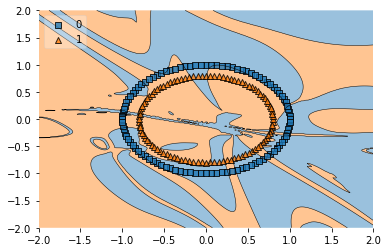

In [95]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'),clf=model6,legend=2)

## **Here we can seethe exploding gradient and overfitting after some steps**

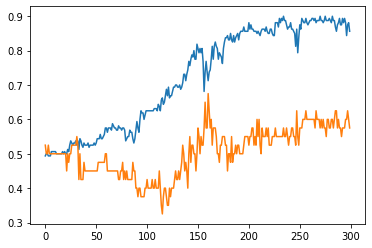

In [96]:
plt.plot(history6.history['accuracy'])
plt.plot(history6.history['val_accuracy'])

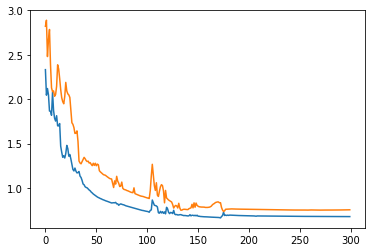

In [88]:
#plt.plot(history4.history4['loss'])
plt.plot(history6.history['loss'])
plt.plot(history6.history['val_loss'])